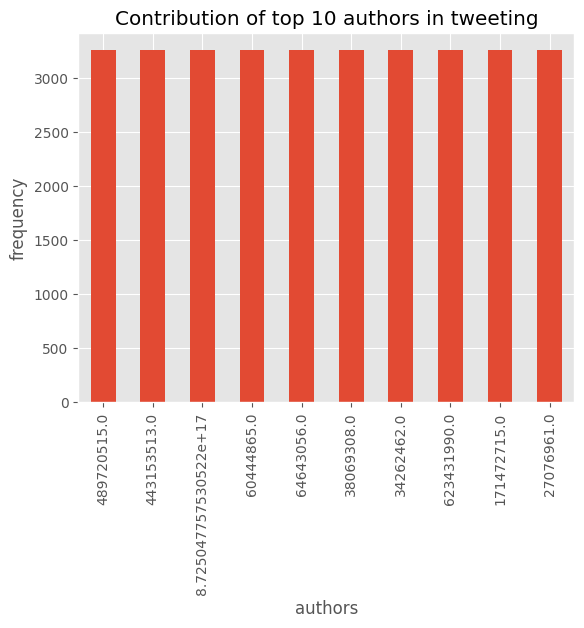

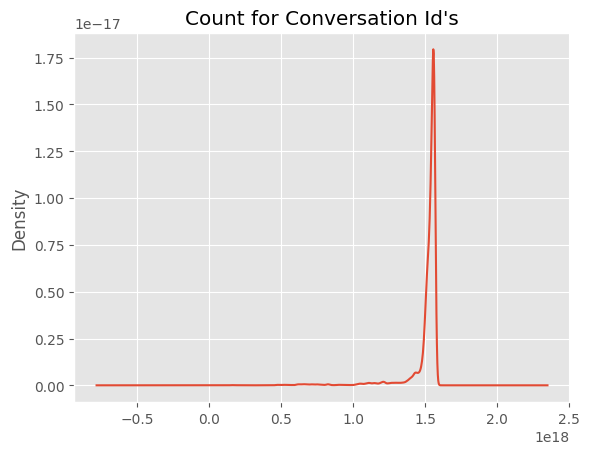

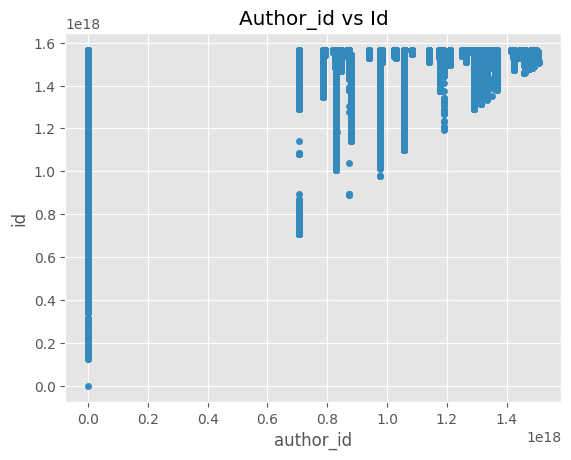

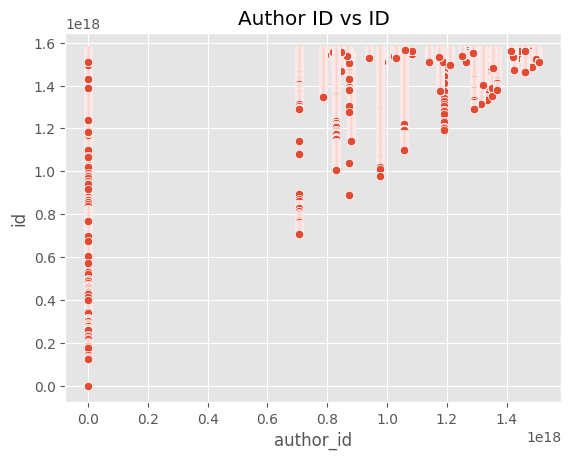

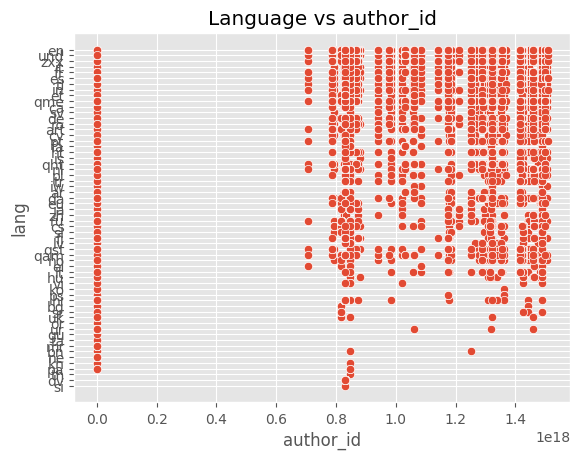

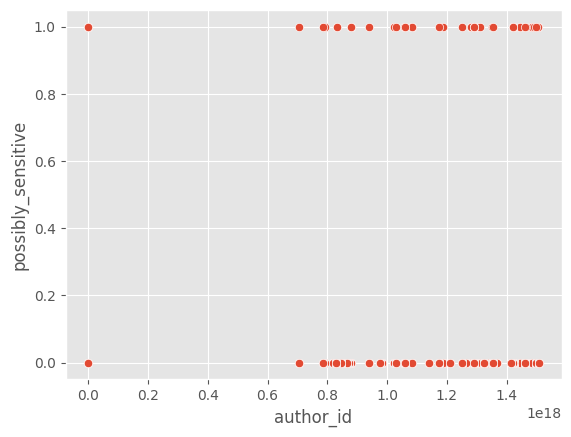

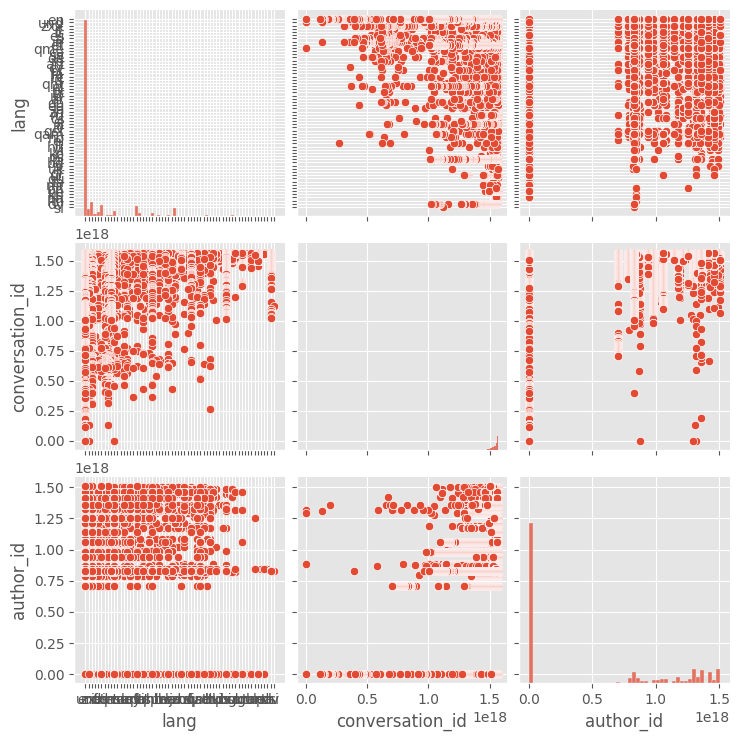

In [1]:
### ||||||EDA FOR TWEETS HISTORY||||||

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#importing dataset
df=pd.read_csv('/kaggle/input/newsarticles/tweet_history.csv', low_memory=False)

#to get total size of dataset
df.shape

#displaying first few rows
df.head()

#to get overall idea of how data types are distributed
df.dtypes

#describing various parameters of dataset
df.describe()

# to show all columns
df.columns

#changing dtype from string to float to visualize data effectively
df['author_id']=pd.to_numeric(df['author_id'], errors='coerce')
df['conversation_id']=pd.to_numeric(df['conversation_id'], errors='coerce')
df['created_at']=pd.to_numeric(df['created_at'], errors='coerce')

#new dtype
df.dtypes

#total missing values for each 
df.isna().sum()

# to look for any duplicated values
df.loc[df.duplicated()]

#to look for subset of duplicated values
df.loc[df.duplicated(subset=['conversation_id'])]

#checking an example duplicate
df.query('conversation_id=="1.033846e+18"')
df= df.loc[~df.duplicated(subset=['author_id','id', 'conversation_id','lang', 'public_metrics', 'text',
                                  'referenced_tweets','withheld'])].reset_index(drop=True).copy()

#shape of new dataset
df.shape

#shape retains as no missing values even in subsets
df['author_id'].value_counts()

###barplot for top 10 author ids
ax=df['author_id'].value_counts().head(10).plot(kind='bar', title='Contribution of top 10 authors in tweeting')
ax.set_xlabel('authors')
ax.set_ylabel('frequency')
plt.show()

#kernel density plot for different conversation ids
ax1= df['conversation_id'].plot(kind='kde', title="Count for Conversation Id's")

###scatter plot for author ids and ID
df.plot(kind='scatter', x='author_id', y='id', title='Author_id vs Id')
plt.show()

### seaborn scatter plot for author ids and ID
ax2= sns.scatterplot(x='author_id', y='id', data=df)
ax2.set_title('Author ID vs ID')
plt.show()

### seaborn scatter plot for author ids and lang
ax3= sns.scatterplot(x='author_id', y='lang', data=df)
ax3.set_title('Language vs author_id')
plt.show()

### seaborn scatter plot for author ids and possibly sensitive content
sns.scatterplot(x='author_id', y='possibly_sensitive', data=df)
plt.show()

#pairplot to show how multiple features affect each other 
sns.pairplot(df, vars=['lang','conversation_id','author_id'])
plt.show()

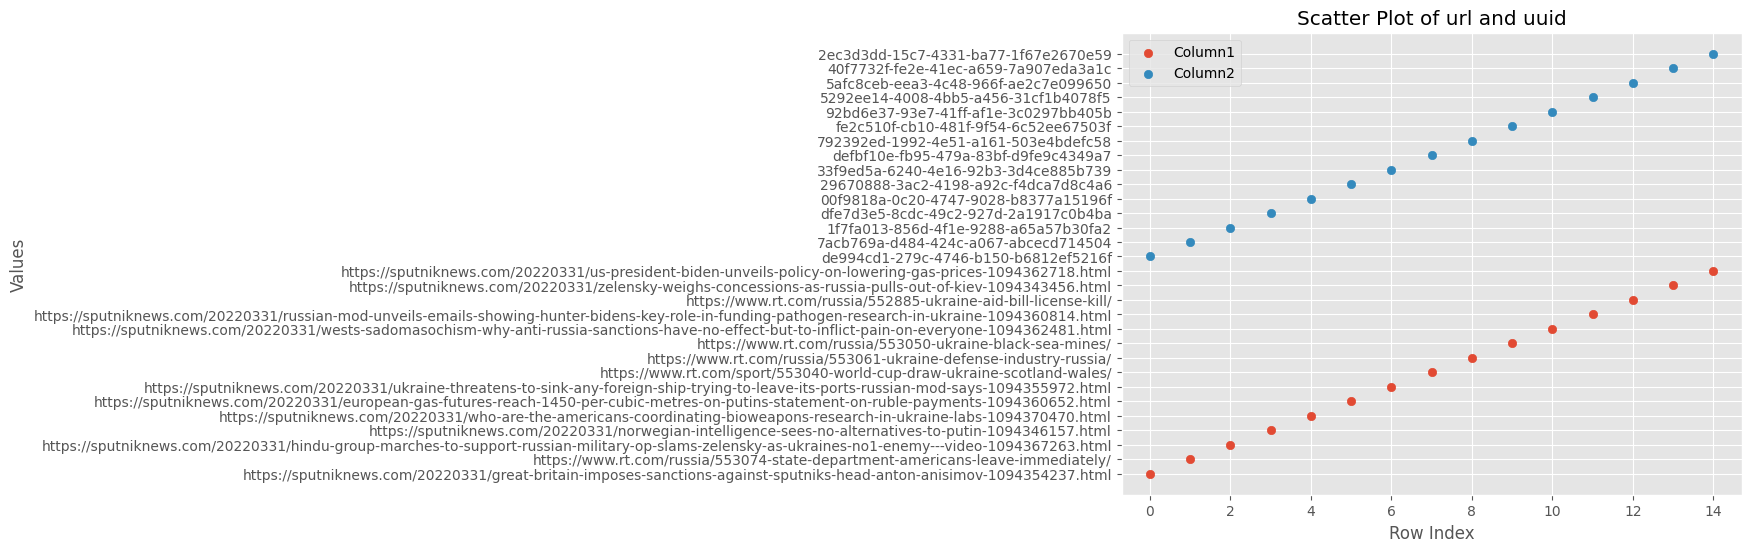

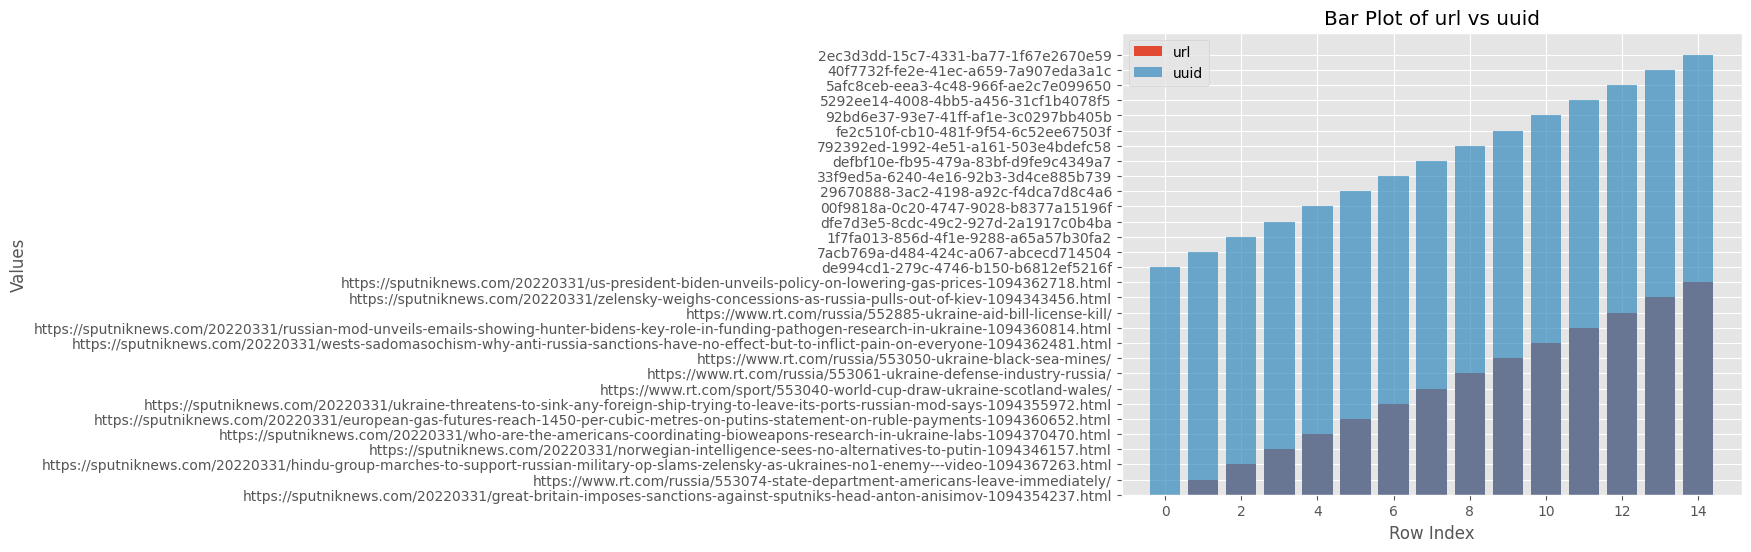

In [2]:
#### ||||EDA for misinfo url

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('/kaggle/input/newsarticles/misinfo_url.csv')
df.dtypes
df.shape
df.columns
### to look at any null values or missing data
df.isna().sum()
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df['url'])), df['url'], label='Column1')
plt.scatter(range(len(df['uuid'])), df['uuid'], label='Column2')
plt.title('Scatter Plot of url and uuid')
plt.xlabel('Row Index')
plt.ylabel('Values')
plt.legend()
plt.show()

#barplot
plt.figure(figsize=(8, 6))
plt.bar(df.index, df['url'], label='url')
plt.bar(df.index, df['uuid'], label='uuid', alpha=0.7)
plt.title('Bar Plot of url vs uuid')
plt.xlabel('Row Index')
plt.ylabel('Values')
plt.legend()
plt.show()
###CONCLSION: each UUID is associated with more misinformation tweets than each URL. 
##suggesting that certain UUIDs are more frequently used 
#or linked to misinformation in dataset compared to the URLs


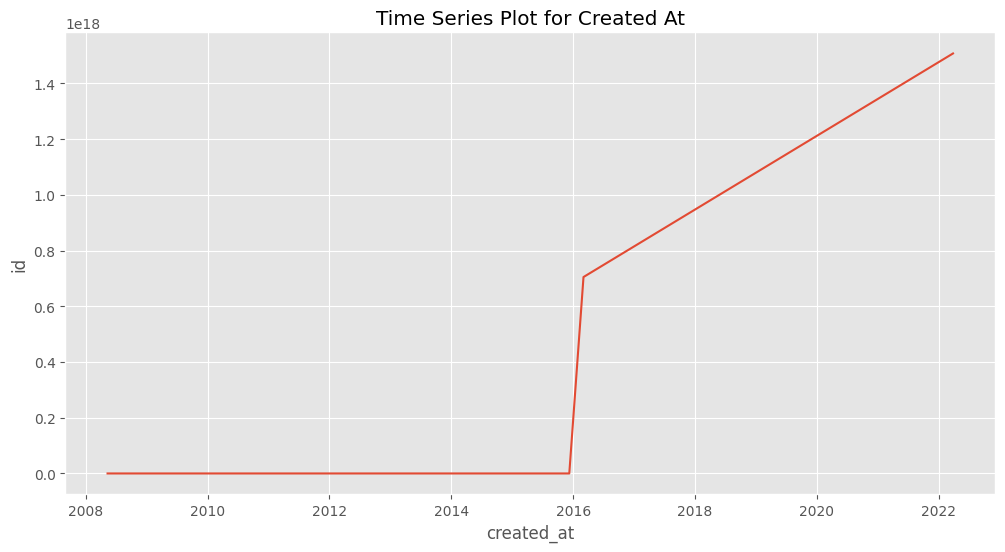

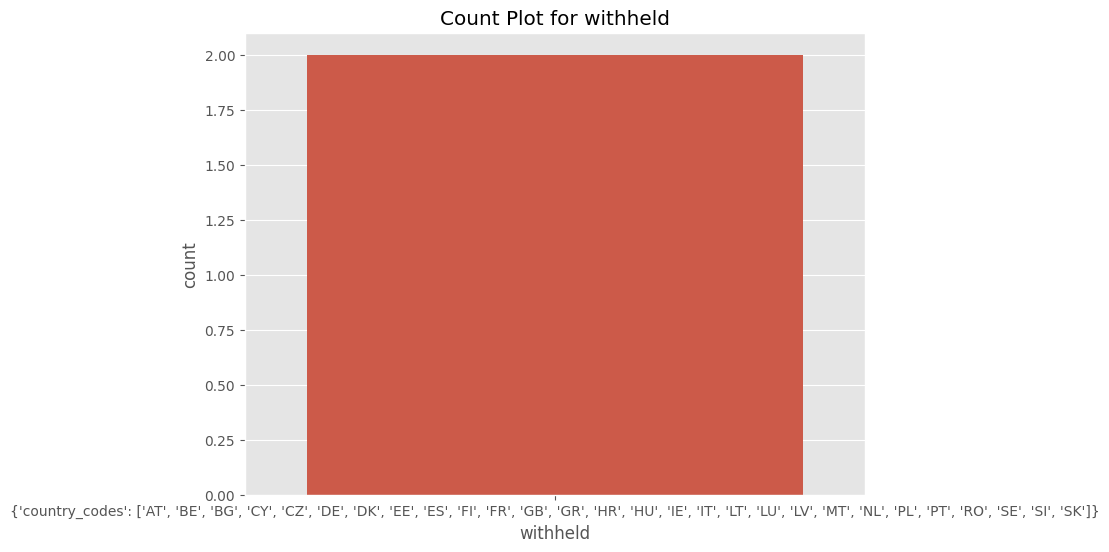

In [3]:
#####|||||EDA for Users
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('/kaggle/input/newsarticles/users.csv')
df.shape
###Time Series Plot for 'created_at'
df['created_at'] = pd.to_datetime(df['created_at'])
df.head()
plt.figure(figsize=(12, 6))
sns.lineplot(x='created_at', y='id', data=df)
plt.title('Time Series Plot for Created At')
plt.show()

#CountPlot for 'withheld' column
plt.figure(figsize=(8, 6))
sns.countplot(x='withheld', data=df)
plt.title('Count Plot for withheld')
plt.show()





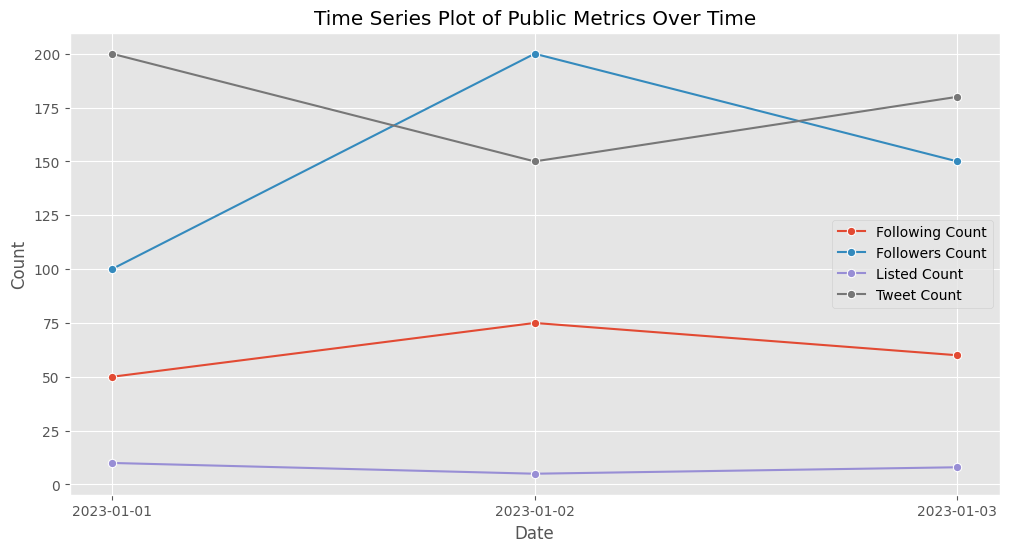

In [4]:
###||||| EDA for followers.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/kaggle/input/newsarticles/followers.csv', low_memory=False)
df.dtypes

#Converting 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

#overview of data
data = {
    'created_at': ['2023-01-01', '2023-01-02', '2023-01-03'],
    'public_metrics': [
        {'followers_count': 100, 'following_count': 50, 'listed_count': 10, 'tweet_count': 200},
        {'followers_count': 200, 'following_count': 75, 'listed_count': 5, 'tweet_count': 150},
        {'followers_count': 150, 'following_count': 60, 'listed_count': 8, 'tweet_count': 180}
    ],
    'description': ['Desc 1', 'Desc 2', 'Desc 3'],
    'entities': ['Entity 1', 'Entity 2', 'Entity 3'],
    'id': ['id1', 'id2', 'id3'],
    'location': ['Loc 1', 'Loc 2', 'Loc 3'],
    'name': ['Name 1', 'Name 2', 'Name 3'],
    'profile_image_url': ['url1', 'url2', 'url3'],
    'username': ['user1', 'user2', 'user3'],
    'withheld': [False, True, False],
    'following': [10, 20, 30]
}
##extracting keys from dictonary of public metrics
df = pd.DataFrame(data)
df[['followers_count', 'following_count', 'listed_count', 'tweet_count']] = df['public_metrics'].apply(lambda x: pd.Series({
    'followers_count': x.get('followers_count', None),
    'following_count': x.get('following_count', None),
    'listed_count': x.get('listed_count', None),
    'tweet_count': x.get('tweet_count', None)
}))

plt.figure(figsize=(12, 6))

# Time-series plot of public metrics over time
sns.lineplot(x='created_at', y='following_count', data=df, marker='o', label='Following Count')
sns.lineplot(x='created_at', y='followers_count', data=df, marker='o', label='Followers Count')
sns.lineplot(x='created_at', y='listed_count', data=df, marker='o', label='Listed Count')
sns.lineplot(x='created_at', y='tweet_count', data=df, marker='o', label='Tweet Count')

plt.title('Time Series Plot of Public Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



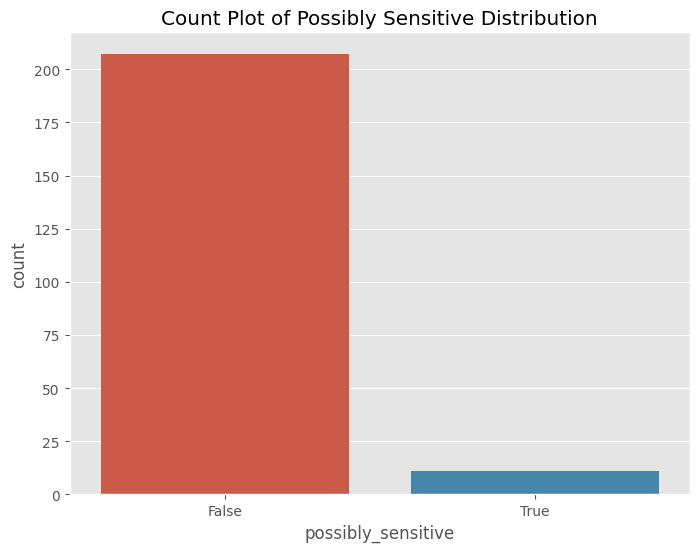

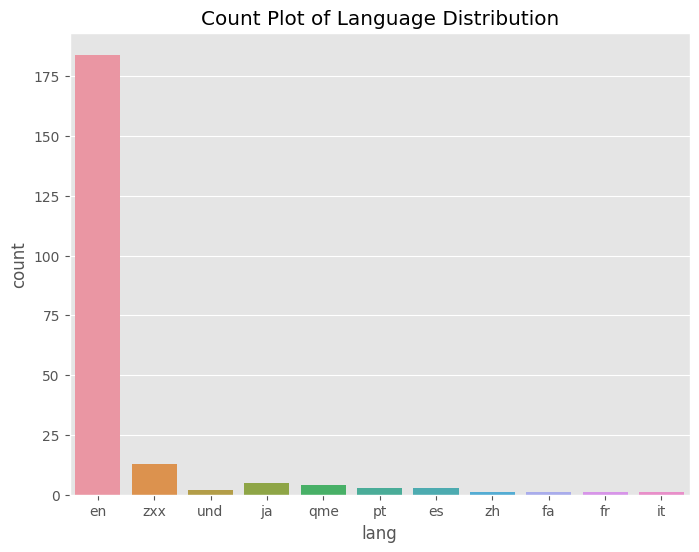

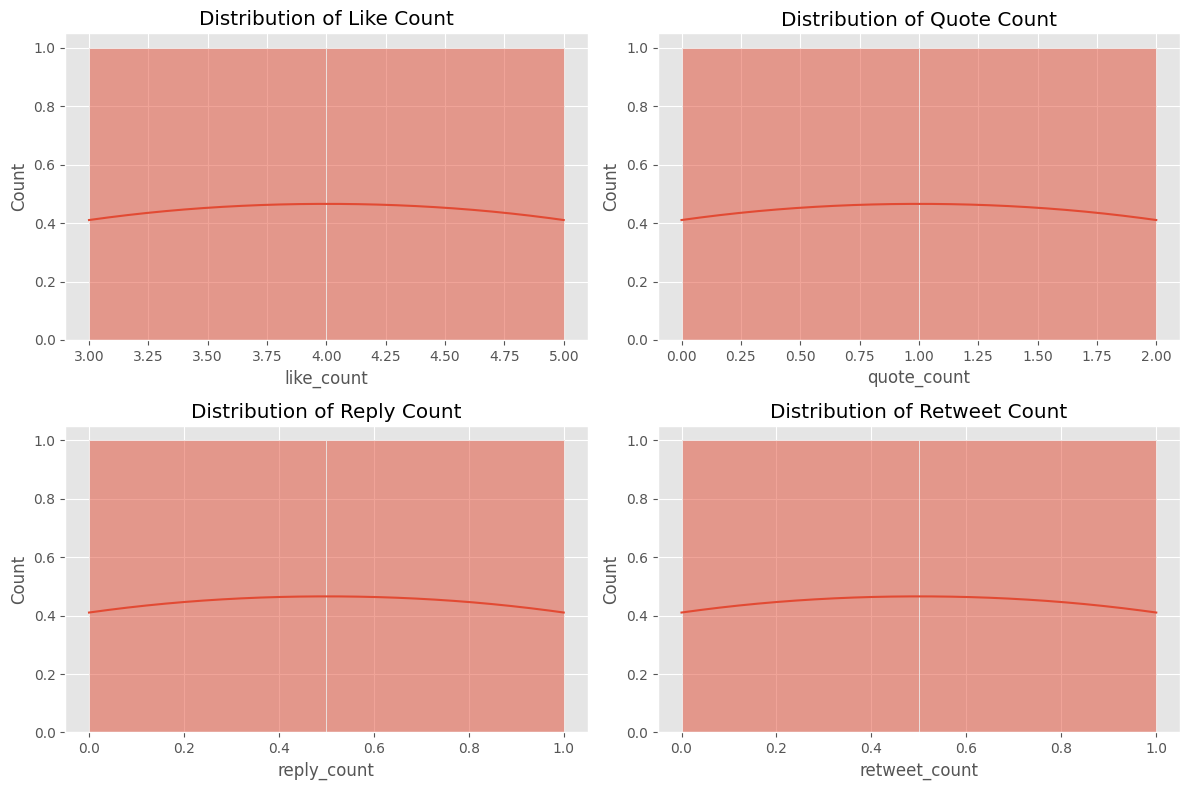

In [5]:
###EDA for misinfo tweets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('/kaggle/input/newsarticles/misinfo_tweets.csv')
df.shape

df.dtypes

#Converting 'created_at' to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Count Plot for 'possibly_sensitive'
plt.figure(figsize=(8, 6))
sns.countplot(x='possibly_sensitive', data=df)
plt.title('Count Plot of Possibly Sensitive Distribution')
plt.show()

# Count Plot for 'lang'
plt.figure(figsize=(8, 6))
sns.countplot(x='lang', data=df)
plt.title('Count Plot of Language Distribution')
plt.show()
df.shape

# overview of data for public metrics
data = {
    'public_metrics': [
        {'like_count': 3, 'quote_count': 0, 'reply_count': 1, 'retweet_count': 0},
        {'like_count': 5, 'quote_count': 2, 'reply_count': 0, 'retweet_count': 1},
        # ... more rows
    ]
}
df = pd.DataFrame(data)

# Normalizing 'public_metrics' column into a separate DataFrame
metrics_df = pd.json_normalize(df['public_metrics'])

# Merging the normalized DataFrame back to the original DataFrame
df = pd.concat([df, metrics_df], axis=1)

# Dropping the original 'public_metrics' column
df = df.drop('public_metrics', axis=1)

# Histogram for each count
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['like_count'], kde=True)
plt.title('Distribution of Like Count')

plt.subplot(2, 2, 2)
sns.histplot(df['quote_count'], kde=True)
plt.title('Distribution of Quote Count')

plt.subplot(2, 2, 3)
sns.histplot(df['reply_count'], kde=True)
plt.title('Distribution of Reply Count')

plt.subplot(2, 2, 4)
sns.histplot(df['retweet_count'], kde=True)
plt.title('Distribution of Retweet Count')

plt.tight_layout()
plt.show()